<p style = "font-size : 40px; color : white ; font-family : 'Bebas Neue'; text-align : center; background-color :#ffad33; border-radius: 5px 5px;"><strong>Augmented Dickey-Fuller</strong></p>

<p style = "font-size : 20px; color : grey ; font-family : 'Bebas Neue'; text-align : left; background-color :#ffecb3; border-radius: 5px 5px;">
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.</p>

## What is a Unit Root Test?
The ADF test belongs to a category of tests called ‘Unit Root Test’, which is the proper method for testing the stationarity of a time series.

So what does a ‘Unit Root’ mean?

Unit root is a characteristic of a time series that makes it non-stationary.   
Technically speaking, a **unit root is said to exist in a time series of the value of alpha = 1** in the below equation.

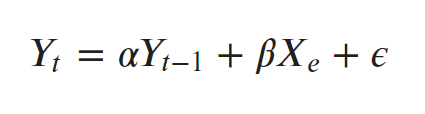  
where,   
Yt is the value of the time series at time ‘t’ and   
Xe is an exogenous variable (a separate explanatory variable, which is also a time series).  

## What does this mean to us?

The presence of a unit root means the time series is non-stationary. Besides, the number of unit roots contained in the series corresponds to the number of differencing operations required to make the series stationary.

Alright, let’s come back to topic.

## Dickey-Fuller Test
Before going into ADF test, let’s first understand what is the Dickey-Fuller test.

A Dickey-Fuller test is a unit root test that tests the mull hypothesis that α=1 in the following model equation. alpha is the coefficient of the first lag on Y.

Null Hypothesis (H0): alpha=1

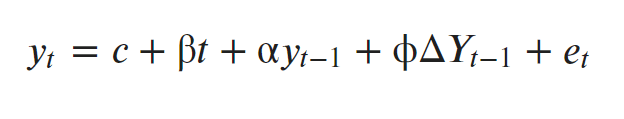

where,

y(t-1) = lag 1 of time series
delta Y(t-1) = first difference of the series at time (t-1)
Fundamentally, it has a similar null hypothesis as the unit root test. That is, the coefficient of Y(t-1) is 1, implying the presence of a unit root. If not rejected, the series is taken to be non-stationary.

The Augmented Dickey-Fuller test evolved based on the above equation and is one of the most common form of Unit Root test.

## How does Augmented Dickey Fuller (ADF) Test work?
As the name suggest, the ADF test is an ‘augmented’ version of the Dickey Fuller test.

The ADF test expands the Dickey-Fuller test equation to include high order regressive process in the model.

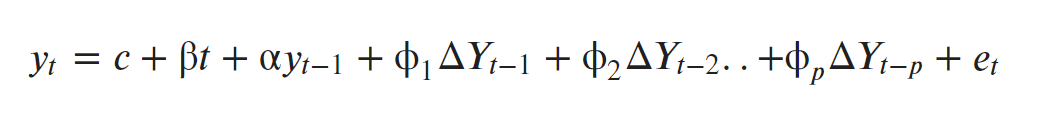

If you notice, we have only added more differencing terms, while the rest of the equation remains the same. This adds more thoroughness to the test.

The null hypothesis however is still the same as the Dickey Fuller test.

A key point to remember here is: Since the null hypothesis assumes the presence of unit root, that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.

However, this is a very common mistake analysts commit with this test. That is, if the p-value is less than significance level, people mistakenly take the series to be non-stationary.

In [1]:
from statsmodels.tsa.stattools import adfuller
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [3]:
### Function to perform Adfuller test

def perform_adf_test(series):                 # Accepts the time series 
    result = adfuller(series)                 # Put the TS into the adfuller function
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])          # This returns P-VALUE, p-value<0.05 means STATIONARY

## AR(1) Process
### Stationary

Text(0.5, 1.0, 'Stationary AR(1) Process')

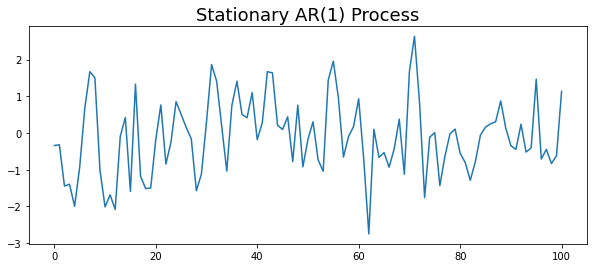

In [4]:
ar_1_process = generate_ar_process(1, [.5], 100)  ## phi1= 0.5
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [5]:
perform_adf_test(ar_1_process)

ADF Statistic: -6.932876
p-value: 0.000000


This graph looked Stationary as it seem to have
1. Constant mean
2. Constant std
3. No Seasonality
**However it is later statistically proven with help of `Dickey-Fuller Test` this is a `Stationary` TS**  
as **p-value = 0.00000**

### Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

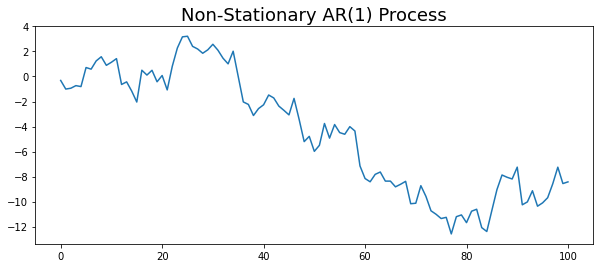

In [6]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)  ## phi1 = 1
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [7]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -1.088123
p-value: 0.719785


This clearly has a **unit root**
Also we can visually see **Mean is not Constant**  
**However it is later statistically proven with help of `Dickey-Fuller Test` this is `Not Stationary` TS**  
as `p-value: 0.719785` which is much higher than 0.05

# AR(2) Process
## Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

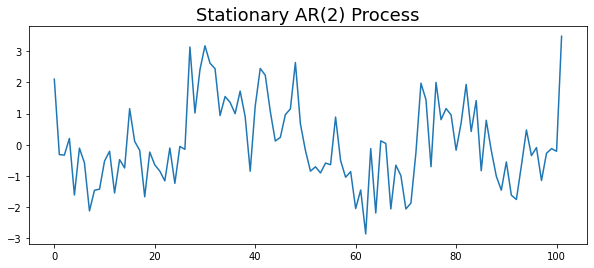

In [8]:
ar_2_process = generate_ar_process(2, [.3, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [9]:
perform_adf_test(ar_2_process)

ADF Statistic: -3.379335
p-value: 0.011684


phi1 = 0.3, phi2 = 0.3  
through graph it look **Stationary**  
**However it is later statistically proven with help of `Dickey-Fuller Test` this is a `Stationary` TS**  
as **p-value = 0.011684**

## Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

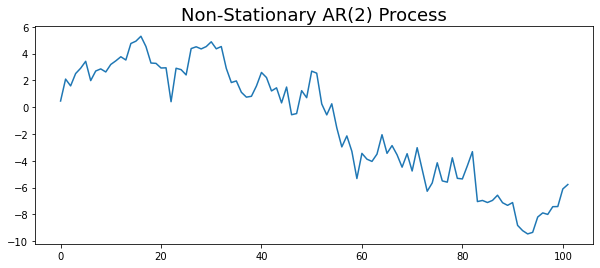

In [15]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)

In [16]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistic: -0.840004
p-value: 0.807088


phi1 = 0.7, phi2 = 0.3  
Graphically looking it doesn't look stationary, mean is fluctuating a lot  
also **p-value: 0.807088**